# Kickstarter Project

Determining the success of kick starter projects.

## Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neural_network import MLPClassifier

from sklearn import preprocessing

import datetime  

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer


import warnings
warnings.filterwarnings('ignore')

### Downloading NLTK
Commented out if already installed.

In [2]:
#nltk.download()

### Settings

In [3]:
#table display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Setting up the Dataframe

In [4]:
df_train = pd.read_csv('KS_train_data.csv', delimiter=',')
df_test = pd.read_csv('KS_test_data.csv', delimiter=';')

### Checking Import

In [5]:
df_test.columns

Index(['project_id', 'blurb', 'category', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'staff_pick',
       'location', 'subcategory', 'project_url', 'reward_url'],
      dtype='object')

In [6]:
df_train.columns

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')

<b>project_id</b>: Unique identifyer <br>
*<b>backers_count</b>: Amount of people supporting the project<br>
<b>blurb</b>: Description of the project<br>
<b>category</b>: type of project<br>
*<b>converted_pledged_amount</b>: pledged amount converted into USD<br>
<b>country</b>: Country project was made in<br>
<b>created_at</b>: Time project was started (Epoch)<br>
<b>currency</b>: Currency of the pledge<br>
<b>deadline</b>: Deadline set for the project (Epoch)<br>
<b>fx_rate</b>: Coversion rate of the currency to USD<br>
<b>goal</b>: Project pledge goal in currency <br>
<b>launched_at</b>: Time the project got launched (Epoch)<br>
<b>name</b>: Name of the project<br>
*<b>pledged</b>: Amount pledged to the project in the currency<br> 
<b>staff_pick</b>: <br>
*<b>usd_pledged</b>: amount pledged in USD<br>
<b>location</b>: Province/state and city the project was created<br>
*<b>funded</b>: Did they recieve the funding<br>
<b>subcategory</b>: further type of the project<br>
<b>project_url</b>: URL to kickstarter page<br>
<b>reward_url</b>: URL to the reward page<br>

<em> Star features are not available in the test set.</em>

## Data Understanding

### Taking a look at the data in both dataframes

In [7]:
df_train.head(5)

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,"I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!",art,3596,US,1325980505,USD,1334866560,1.0,2800.0,1332969260,Elsewhere Studios artist-in-residency program!,3596.0,False,3596.0,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program/rewards
1,KS_000001,82,1000 Artists is a public art-making installation on the Washington Mall which will occur on January 21 and 22nd 2013.,art,4586,US,1330926084,USD,1336440145,1.0,4500.0,1332984145,1000 Artists: Presidential Inauguration 2013,4586.0,False,4586.0,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013/rewards
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneHenge"" celebrates Community across Virtual and Real Worlds.",art,5217,US,1332382894,USD,1338175739,1.0,5000.0,1332991739,MyPhoneHenge,5217.0,False,5217.0,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/myphonehenge,https://www.kickstarter.com/projects/belveal/myphonehenge/rewards
3,KS_000003,37,A film exploring the role and value of art education today through the history of the seminal California Institute of the Arts.,art,7160,GB,1332342451,USD,1334806096,1.0,6500.0,1332991696,Walk-Through,7160.0,False,7160.0,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/1078130915/walk-through,https://www.kickstarter.com/projects/1078130915/walk-through/rewards
4,KS_000004,153,"We need to build a kitchen for Habitable Spaces, a self sustaining farm and artist residency on a ranch in Texas.",art,15445,US,1328562617,USD,1335584240,1.0,15000.0,1332992240,A kitchen for Habitable Spaces,15445.0,False,15445.0,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces/rewards


In [8]:
df_test.head(5)

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,subcategory,project_url,reward_url
0,KS_100000,We are looking to bring a Visiting Sculptor from the Ivory Coast to work with our students to create a sculpture of MLK for our campus.,art,US,1330727362,USD,1334959598,1.0,3900.0,1332972398,Martin Luther King Jr. Sculpture on Campus!,False,"Bakersfield, CA",art,https://www.kickstarter.com/projects/1536850207/martin-luther-king-jr-sculpture-on-campus,https://www.kickstarter.com/projects/1536850207/martin-luther-king-jr-sculpture-on-campus/rewards
1,KS_100001,Surrealistic oil paintings capturing the metamorphosis of organic forms springing to life.,art,US,1332598567,USD,1334635140,1.0,750.0,1332975679,EMERGENCE: Surreal Oil Paintings by J.J. Long,False,"Lowell, MA",painting,https://www.kickstarter.com/projects/2039713907/emergence-surreal-oil-paintings-by-jj-long,https://www.kickstarter.com/projects/2039713907/emergence-surreal-oil-paintings-by-jj-long/rewards
2,KS_100002,P.M.A.F.T.W. my upcoming solo show June 2012 at Land Gallery.,art,US,1332476607,USD,1333421843,1.0,1000.0,1332989843,P.M.A.F.T.W.,False,"Portland, OR",painting,https://www.kickstarter.com/projects/1442314751/pmaftw,https://www.kickstarter.com/projects/1442314751/pmaftw/rewards
3,KS_100003,A series of images about the art/artist and love on the playa at Burning Man. To be in book form. Quotes from all the artist included.,art,US,1327538509,USD,1338231398,1.0,15000.0,1333047398,MetropoLOVE - Book project to be completed from 2010,False,"Imlay, NV",public art,https://www.kickstarter.com/projects/199636585/metropolove-book-project-to-be-completed-from-2010,https://www.kickstarter.com/projects/199636585/metropolove-book-project-to-be-completed-from-2010/rewards
4,KS_100004,Become a part of the first crowd-funded community-driven open online course on digital storytelling.,art,US,1332705528,USD,1334606400,1.0,4200.0,1333049586,DS106: The Open Online Community of Digital Storytellers,True,"Fredericksburg, VA",digital art,https://www.kickstarter.com/projects/jimgroom/ds106-the-open-online-community-of-digital-storyte,https://www.kickstarter.com/projects/jimgroom/ds106-the-open-online-community-of-digital-storyte/rewards


### Goals
1) Categorizing whether a project in df_test is funded or not.<br>
2) Predicting the amount pledged a project will recieve.<br>
3) Implementing TF-IDF to determine the key words that get people exciting for a kickstarter.<br>

### Visualizing the data we have
Correlation: <br>
All of the pledged amounts, they are functional dependancies with fx_rate. <br>
Backers count correlates with the pledgeds, more people more money. <br>
Created, deadline and launched correlation, likely to also be a functional dependancie with time. <br>

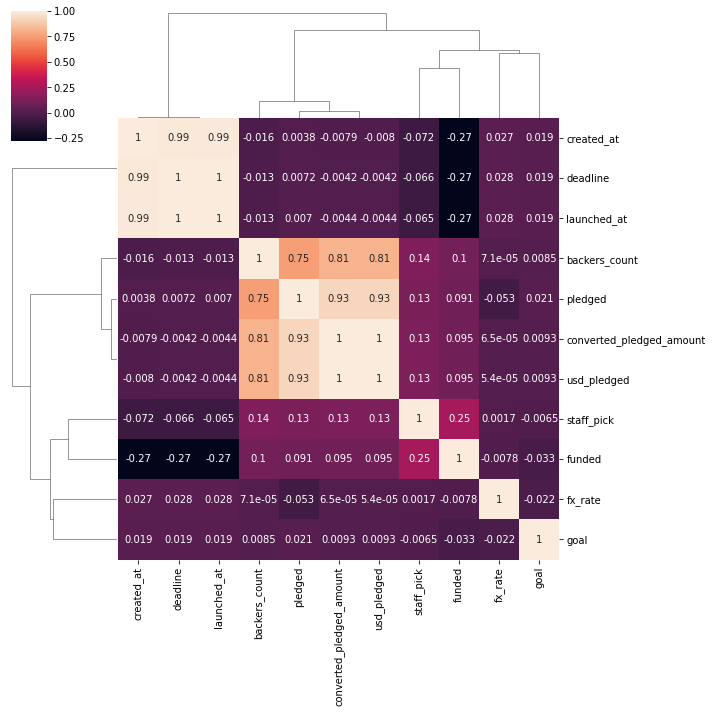

In [9]:
sns.clustermap(df_train.corr(), annot=True)

In [10]:
df_train.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,launched_at,pledged,usd_pledged
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,151.089430,1.241108e+04,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,1.312485e+04,1.241284e+04
std,1163.024964,1.005545e+05,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,1.080345e+05,1.005368e+05
min,0.000000,0.000000e+00,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000e+00,0.000000e+00
25%,4.000000,1.250000e+02,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,1.250000e+02,1.250000e+02
50%,28.000000,1.650000e+03,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,1.635500e+03,1.651000e+03
75%,86.000000,6.271250e+03,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,6.310000e+03,6.275042e+03
max,105857.000000,1.026684e+07,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,1.026685e+07,1.026685e+07


## Feature Derivation: Label Encoder
#### Initial Notes
Goal amount is in the original curreny. Confirmed by going to the project url <br>
Timed features are in Epoch. <br>
Can find the duration of a project easily. <br>
Funded best correlates to staff pick <br>

In [11]:
df_train.dtypes

project_id                   object
backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
currency                     object
deadline                      int64
fx_rate                     float64
goal                        float64
launched_at                   int64
name                         object
pledged                     float64
staff_pick                     bool
usd_pledged                 float64
location                     object
funded                         bool
subcategory                  object
project_url                  object
reward_url                   object
dtype: object

In [12]:
df_train["country"] = df_train["country"].astype('category')
df_train["category"] = df_train["category"].astype('category')
df_train["subcategory"] = df_train["subcategory"].astype('category')
df_train["country_cat"] = df_train["country"].cat.codes
df_train["category_cat"] = df_train["category"].cat.codes
df_train["subcategory_cat"] = df_train["subcategory"].cat.codes

In [13]:
df_train.head()

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url,country_cat,category_cat,subcategory_cat
0,KS_000000,80,"I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!",art,3596,US,1325980505,USD,1334866560,1.0,2800.0,1332969260,Elsewhere Studios artist-in-residency program!,3596.0,False,3596.0,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program/rewards,162,0,86
1,KS_000001,82,1000 Artists is a public art-making installation on the Washington Mall which will occur on January 21 and 22nd 2013.,art,4586,US,1330926084,USD,1336440145,1.0,4500.0,1332984145,1000 Artists: Presidential Inauguration 2013,4586.0,False,4586.0,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013/rewards,162,0,113
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneHenge"" celebrates Community across Virtual and Real Worlds.",art,5217,US,1332382894,USD,1338175739,1.0,5000.0,1332991739,MyPhoneHenge,5217.0,False,5217.0,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/myphonehenge,https://www.kickstarter.com/projects/belveal/myphonehenge/rewards,162,0,127
3,KS_000003,37,A film exploring the role and value of art education today through the history of the seminal California Institute of the Arts.,art,7160,GB,1332342451,USD,1334806096,1.0,6500.0,1332991696,Walk-Through,7160.0,False,7160.0,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/1078130915/walk-through,https://www.kickstarter.com/projects/1078130915/walk-through/rewards,56,0,10
4,KS_000004,153,"We need to build a kitchen for Habitable Spaces, a self sustaining farm and artist residency on a ranch in Texas.",art,15445,US,1328562617,USD,1335584240,1.0,15000.0,1332992240,A kitchen for Habitable Spaces,15445.0,False,15445.0,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces/rewards,162,0,113


### Feature Derivation: <em>usd_goal</em>
Standardizing <em>goal</em> to USD to work with <em>usd_pledged</em>. <br>
Values using <em>fx_rate</em> are rounded.

In [14]:
df_train['usd_goal'] = df_train['goal'] * df_train['fx_rate']
df_train['usd_goal'] = df_train['usd_goal'].round(0)

In [15]:
df_train.query('(currency != "USD")')[['currency','fx_rate', 'goal', 'usd_goal']].head(5)

,currency,fx_rate,goal,usd_goal
997,EUR,1.245664,1000.0,1246.0
998,CAD,0.800599,2600.0,2082.0
1001,GBP,1.401112,5000.0,7006.0
1005,MXN,0.053931,30000.0,1618.0
1012,AUD,0.793186,6000.0,4759.0


### Feature Derivation: <em>project_duration</em>
    

In [16]:
df_train['project_duration_seconds'] = df_train['launched_at'] - df_train['created_at']
df_train['project_duration_days'] = df_train['project_duration_seconds'] /86400

In [17]:
df_train[['created_at','launched_at', 'project_duration_seconds','project_duration_days']].head(5)

,created_at,launched_at,project_duration_seconds,project_duration_days
0,1325980505,1332969260,6988755,80.888368
1,1330926084,1332984145,2058061,23.820150
2,1332382894,1332991739,608845,7.046817
3,1332342451,1332991696,649245,7.514410
4,1328562617,1332992240,4429623,51.268785


### Feature derivation: TF_IDF

In [18]:
print(df_train.loc[[5423]])
df_train.drop(index=5423, inplace=True)

     project_id  backers_count blurb category  converted_pledged_amount  \
5423  KS_005423              5   NaN      art                       220   

     country  created_at currency    deadline  fx_rate     goal  launched_at  \
5423      US  1320612894      USD  1323061140      1.0  35000.0   1320620155   

     name  pledged  staff_pick  usd_pledged   location  funded subcategory  \
5423  NaN    220.0       False        220.0  Milan, IN   False    painting   

                                                                                         project_url  \
5423  https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters   

                                                                                                  reward_url  \
5423  https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters/rewards   

      country_cat  category_cat  subcategory_cat  usd_goal  \
5423          162             0    

In [19]:
values = df_train['name'].str.lower()
sentence = values.str.cat(sep=' ')

words = pd.DataFrame()

#removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
words = words.append(tokenizer.tokenize(sentence))


w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

words['lemm'] = words[0].apply(lemmatize_text)
words['lemm']
wordStr = words['lemm'].to_string()
wordStr = wordStr.split()
tfidf = TfidfVectorizer(max_df=.65, min_df=500, stop_words=stopwords.words('english'), use_idf=True, norm=None)
x = tfidf.fit_transform(wordStr)
tfidf_train = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names())

In [20]:
df_train["tf_idf"] = tfidf_train.sum(axis=1)
df_train["tf_idf"].head(5)

0    0.000000
1    0.000000
2    0.000000
3    8.205602
4    0.000000
Name: tf_idf, dtype: float64

## Outliers & Errors

### Funded feature<br>
If the pledged is larger than the goal then the project should be funded.

In [21]:
df_train.query('( usd_pledged > usd_goal) & not funded')[['pledged','fx_rate','usd_pledged','usd_goal','goal','funded','project_url']]

,pledged,fx_rate,usd_pledged,usd_goal,goal,funded,project_url
2483,9611.0,0.800599,8559.652133,8006.0,10000.0,False,https://www.kickstarter.com/projects/enerzee/frozen-expressions-portraits
24227,440.0,1.401112,705.583894,701.0,500.0,False,https://www.kickstarter.com/projects/867993510/communi-cut-magazine
25907,3589.0,1.401112,5687.562808,5604.0,4000.0,False,https://www.kickstarter.com/projects/399529356/trashtatt-premium-artist-designed-temporary-tattoo
28186,149458.0,0.053931,8405.843738,8090.0,150000.0,False,https://www.kickstarter.com/projects/1969424860/lahay-shoes-design-artisan-ethics-sustainability
53528,1761.0,1.401112,3021.723462,2802.0,2000.0,False,https://www.kickstarter.com/projects/thirdmoonpublishing/the-neon-forever-retro-style-playing-cards-deck
53539,855.0,1.401112,1450.669599,1401.0,1000.0,False,https://www.kickstarter.com/projects/opg-games/kinbaku-the-bdsm-card-game-help-to-fund-this-card
57121,3087.5,1.000000,3087.500000,3000.0,3000.0,False,https://www.kickstarter.com/projects/1755876060/music-empowers-a-day-with-the-accende-ensemble
88018,36479.0,1.389543,58734.595315,55582.0,40000.0,False,https://www.kickstarter.com/projects/917853492/dreembee-sweet-dreams
93303,46629.0,1.389543,73332.180042,68088.0,49000.0,False,https://www.kickstarter.com/projects/2017062404/b-unstoppable


Here we can see goals that have funded returned as false even though they have met the goal.

#### Error in <em> usd_pledged </em>
Instead this should be calculated again from <em>pledged</em> and <em>fx_rate</em>

In [22]:
df_train['new_usd_pledged'] = df_train['pledged'] * df_train['fx_rate']
df_train['new_usd_pledged'] = df_train['new_usd_pledged'].round(0)

In [23]:
df_train.query('( new_usd_pledged > usd_goal) & not funded')[['new_usd_pledged','usd_goal','funded','project_url']]

,new_usd_pledged,usd_goal,funded,project_url
57121,3088.0,3000.0,False,https://www.kickstarter.com/projects/1755876060/music-empowers-a-day-with-the-accende-ensemble


In [24]:
df_train.query('( new_usd_pledged < usd_goal) & funded')[['new_usd_pledged','usd_goal','funded','project_url']]

,new_usd_pledged,usd_goal,funded,project_url


This leaves us with 1 record that seems to not follow the logic that for a project to be funded it needs to meet its goal. The reason for this is currently unknown as even on the url it has met the goal.

#### Checking funded column with <em> new_usd_pledged</em>

In [25]:
df_train.query('(new_usd_pledged >=  usd_goal) & funded')[['new_usd_pledged','usd_goal','funded','project_url']]

,new_usd_pledged,usd_goal,funded,project_url
0,3596.0,2800.0,True,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program
1,4586.0,4500.0,True,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013
2,5217.0,5000.0,True,https://www.kickstarter.com/projects/belveal/myphonehenge
3,7160.0,6500.0,True,https://www.kickstarter.com/projects/1078130915/walk-through
4,15445.0,15000.0,True,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces
...,...,...,...,...
99995,7595.0,7000.0,True,https://www.kickstarter.com/projects/jimmycarbone/help-fund-the-back-room-arts-space-at-jimmys-no-43
99996,27197.0,25000.0,True,https://www.kickstarter.com/projects/rvacomedy/the-coalition-theater-0
99997,7226.0,5500.0,True,https://www.kickstarter.com/projects/1601712092/the-voix-de-ville-a-pop-up-theater-and-cabaret
99998,31683.0,25000.0,True,https://www.kickstarter.com/projects/967829854/save-the-studio


In [26]:
df_train.query('funded')[['new_usd_pledged','usd_goal','funded']]

,new_usd_pledged,usd_goal,funded
0,3596.0,2800.0,True
1,4586.0,4500.0,True
2,5217.0,5000.0,True
3,7160.0,6500.0,True
4,15445.0,15000.0,True
...,...,...,...
99995,7595.0,7000.0,True
99996,27197.0,25000.0,True
99997,7226.0,5500.0,True
99998,31683.0,25000.0,True


Funded column now matches with the goal and pledge with both returning 58 454 records

## Test Feature derivation


In [27]:
df_test['usd_goal'] = df_test['goal'] * df_test['fx_rate']
df_test['usd_goal'] = df_test['usd_goal'].round(0)
df_test['project_duration_seconds'] = df_test['launched_at'] - df_test['created_at']
df_test['project_duration_days'] = df_test['project_duration_seconds'] /86400

df_test["country"] = df_test["country"].astype('category')
df_test["category"] = df_test["category"].astype('category')
df_test["subcategory"] = df_test["subcategory"].astype('category')
df_test["country_cat"] = df_test["country"].cat.codes
df_test["category_cat"] = df_test["category"].cat.codes
df_test["subcategory_cat"] = df_test["subcategory"].cat.codes

In [28]:
tvalues = df_test['name'].str.lower()
tsentence = tvalues.str.cat(sep=' ')

twords = pd.DataFrame()

#removes punctuation
tokenizer = RegexpTokenizer(r'\w+')
twords = twords.append(tokenizer.tokenize(tsentence))

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

twords['lemm'] = twords[0].apply(lemmatize_text)
twords['lemm']
twordStr = twords['lemm'].to_string()
twordStr = twordStr.split()
tfidf_test = TfidfVectorizer(max_df=.65, min_df=500, stop_words=stopwords.words('english'), use_idf=True, norm=None)
xt = tfidf_test.fit_transform(wordStr)
tfidf_test = pd.DataFrame(xt.toarray(), columns=tfidf.get_feature_names())

In [29]:
df_test["tf_idf"] = tfidf_test.sum(axis=1)

In [30]:
df_test.head(5)

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,subcategory,project_url,reward_url,usd_goal,project_duration_seconds,project_duration_days,country_cat,category_cat,subcategory_cat,tf_idf
0,KS_100000,We are looking to bring a Visiting Sculptor from the Ivory Coast to work with our students to create a sculpture of MLK for our campus.,art,US,1330727362,USD,1334959598,1.0,3900.0,1332972398,Martin Luther King Jr. Sculpture on Campus!,False,"Bakersfield, CA",art,https://www.kickstarter.com/projects/1536850207/martin-luther-king-jr-sculpture-on-campus,https://www.kickstarter.com/projects/1536850207/martin-luther-king-jr-sculpture-on-campus/rewards,3900.0,2245036,25.984213,162,0,10,0.000000
1,KS_100001,Surrealistic oil paintings capturing the metamorphosis of organic forms springing to life.,art,US,1332598567,USD,1334635140,1.0,750.0,1332975679,EMERGENCE: Surreal Oil Paintings by J.J. Long,False,"Lowell, MA",painting,https://www.kickstarter.com/projects/2039713907/emergence-surreal-oil-paintings-by-jj-long,https://www.kickstarter.com/projects/2039713907/emergence-surreal-oil-paintings-by-jj-long/rewards,750.0,377112,4.364722,162,0,95,0.000000
2,KS_100002,P.M.A.F.T.W. my upcoming solo show June 2012 at Land Gallery.,art,US,1332476607,USD,1333421843,1.0,1000.0,1332989843,P.M.A.F.T.W.,False,"Portland, OR",painting,https://www.kickstarter.com/projects/1442314751/pmaftw,https://www.kickstarter.com/projects/1442314751/pmaftw/rewards,1000.0,513236,5.940231,162,0,95,0.000000
3,KS_100003,A series of images about the art/artist and love on the playa at Burning Man. To be in book form. Quotes from all the artist included.,art,US,1327538509,USD,1338231398,1.0,15000.0,1333047398,MetropoLOVE - Book project to be completed from 2010,False,"Imlay, NV",public art,https://www.kickstarter.com/projects/199636585/metropolove-book-project-to-be-completed-from-2010,https://www.kickstarter.com/projects/199636585/metropolove-book-project-to-be-completed-from-2010/rewards,15000.0,5508889,63.760289,162,0,113,8.205602
4,KS_100004,Become a part of the first crowd-funded community-driven open online course on digital storytelling.,art,US,1332705528,USD,1334606400,1.0,4200.0,1333049586,DS106: The Open Online Community of Digital Storytellers,True,"Fredericksburg, VA",digital art,https://www.kickstarter.com/projects/jimgroom/ds106-the-open-online-community-of-digital-storyte,https://www.kickstarter.com/projects/jimgroom/ds106-the-open-online-community-of-digital-storyte/rewards,4200.0,344058,3.982153,162,0,36,0.000000


## Models

In [31]:
f_train = df_train[['usd_goal','project_duration_days','subcategory_cat','category_cat','country_cat','staff_pick','tf_idf']]
f_test = df_test[['usd_goal','project_duration_days','subcategory_cat','category_cat','country_cat','staff_pick','tf_idf']]



In [32]:
f_test.head(5)

,usd_goal,project_duration_days,subcategory_cat,category_cat,country_cat,staff_pick,tf_idf
0,3900.0,25.984213,10,0,162,False,0.000000
1,750.0,4.364722,95,0,162,False,0.000000
2,1000.0,5.940231,95,0,162,False,0.000000
3,15000.0,63.760289,113,0,162,False,8.205602
4,4200.0,3.982153,36,0,162,True,0.000000


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = f_train
y = df_train['funded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier(n_estimators=750, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

k = 5
kf = KFold(n_splits=k, random_state=None)

result = cross_val_score(rf , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))
print(rf.score(X_test, y_test))

Avg accuracy: 0.6310466733336666
0.7699666666666667


In [38]:
X_test1 = f_test

df_test['funded'] = rf.predict(X_test1)

df_test.to_csv('predictions.tsv', columns=['project_id','funded'])

project_id                  46960
blurb                       46960
category                    46960
country                     46958
created_at                  46960
currency                    46960
deadline                    46960
fx_rate                     46960
goal                        46960
launched_at                 46960
name                        46960
staff_pick                  46960
location                    46960
subcategory                 46960
project_url                 46960
reward_url                  46960
usd_goal                    46960
project_duration_seconds    46960
project_duration_days       46960
country_cat                 46960
category_cat                46960
subcategory_cat             46960
tf_idf                      46960
funded                      46960
dtype: int64

In [35]:
X5 = f_train
y5 = df_train['funded']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=0)

model5 = MLPClassifier(random_state=0)
model5.fit(X_train5, y_train5)
print(model5.score(X_test5, y_test5))

print(rf.score(X_test5, y_test5))
#df_test['funded'] = rf.predict(X_test)
df_test.head(10)

0.64444
0.93324


,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,subcategory,project_url,reward_url,usd_goal,project_duration_seconds,project_duration_days,country_cat,category_cat,subcategory_cat,tf_idf,funded
0,KS_100000,We are looking to bring a Visiting Sculptor from the Ivory Coast to work with our students to create a sculpture of MLK for our campus.,art,US,1330727362,USD,1334959598,1.0,3900.0,1332972398,Martin Luther King Jr. Sculpture on Campus!,False,"Bakersfield, CA",art,https://www.kickstarter.com/projects/1536850207/martin-luther-king-jr-sculpture-on-campus,https://www.kickstarter.com/projects/1536850207/martin-luther-king-jr-sculpture-on-campus/rewards,3900.0,2245036,25.984213,162,0,10,0.000000,True
1,KS_100001,Surrealistic oil paintings capturing the metamorphosis of organic forms springing to life.,art,US,1332598567,USD,1334635140,1.0,750.0,1332975679,EMERGENCE: Surreal Oil Paintings by J.J. Long,False,"Lowell, MA",painting,https://www.kickstarter.com/projects/2039713907/emergence-surreal-oil-paintings-by-jj-long,https://www.kickstarter.com/projects/2039713907/emergence-surreal-oil-paintings-by-jj-long/rewards,750.0,377112,4.364722,162,0,95,0.000000,True
2,KS_100002,P.M.A.F.T.W. my upcoming solo show June 2012 at Land Gallery.,art,US,1332476607,USD,1333421843,1.0,1000.0,1332989843,P.M.A.F.T.W.,False,"Portland, OR",painting,https://www.kickstarter.com/projects/1442314751/pmaftw,https://www.kickstarter.com/projects/1442314751/pmaftw/rewards,1000.0,513236,5.940231,162,0,95,0.000000,False
3,KS_100003,A series of images about the art/artist and love on the playa at Burning Man. To be in book form. Quotes from all the artist included.,art,US,1327538509,USD,1338231398,1.0,15000.0,1333047398,MetropoLOVE - Book project to be completed from 2010,False,"Imlay, NV",public art,https://www.kickstarter.com/projects/199636585/metropolove-book-project-to-be-completed-from-2010,https://www.kickstarter.com/projects/199636585/metropolove-book-project-to-be-completed-from-2010/rewards,15000.0,5508889,63.760289,162,0,113,8.205602,False
4,KS_100004,Become a part of the first crowd-funded community-driven open online course on digital storytelling.,art,US,1332705528,USD,1334606400,1.0,4200.0,1333049586,DS106: The Open Online Community of Digital Storytellers,True,"Fredericksburg, VA",digital art,https://www.kickstarter.com/projects/jimgroom/ds106-the-open-online-community-of-digital-storyte,https://www.kickstarter.com/projects/jimgroom/ds106-the-open-online-community-of-digital-storyte/rewards,4200.0,344058,3.982153,162,0,36,0.000000,True
5,KS_100005,I will be creating an artist book edition at Minnesota Center for the Book Arts using letterpress and photopolymer plates.,art,US,1330042590,USD,1335758400,1.0,2500.0,1332961593,"Everything You Hear (working title), an artist book",False,"Minneapolis, MN",mixed media,https://www.kickstarter.com/projects/938956896/everything-you-hear-working-title-an-artist-book,https://www.kickstarter.com/projects/938956896/everything-you-hear-working-title-an-artist-book/rewards,2500.0,2919003,33.784757,162,0,86,8.485869,True
6,KS_100006,"Inside these pages are the building blocks of Hot Rod Illustration! Ever wanted to draw a Hot Rod? well, it's all right here!",art,US,1321976772,USD,1335559247,1.0,9000.0,1332967247,"Hot Rod Illustration #101, Drawing AUTOS WITH MOTIVE!",False,"Sharon, VT",illustration,https://www.kickstarter.com/projects/832720854/hot-rod-illustration-101-drawing-autos-with-motive,https://www.kickstarter.com/projects/832720854/hot-rod-illustration-101-drawing-autos-with-motive/rewards,9000.0,10990475,127.204572,162,0,69,0.000000,True
7,KS_100007,Bobo's Bayou will be making its debut at the Montana Burning Man Regional Event and then off to Burning Man 2012!,art,US,1329377445,USD,1331971953,1.0,3500.0,1329383553,Bobo's Bayou,False,"Missoula, MT",public art,https://www.kickstarter.com/projects/338398024/nexus-bayou-art-car,https://www.kicks

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/Cellar/jupyterlab/3.1.10/libexec/lib/

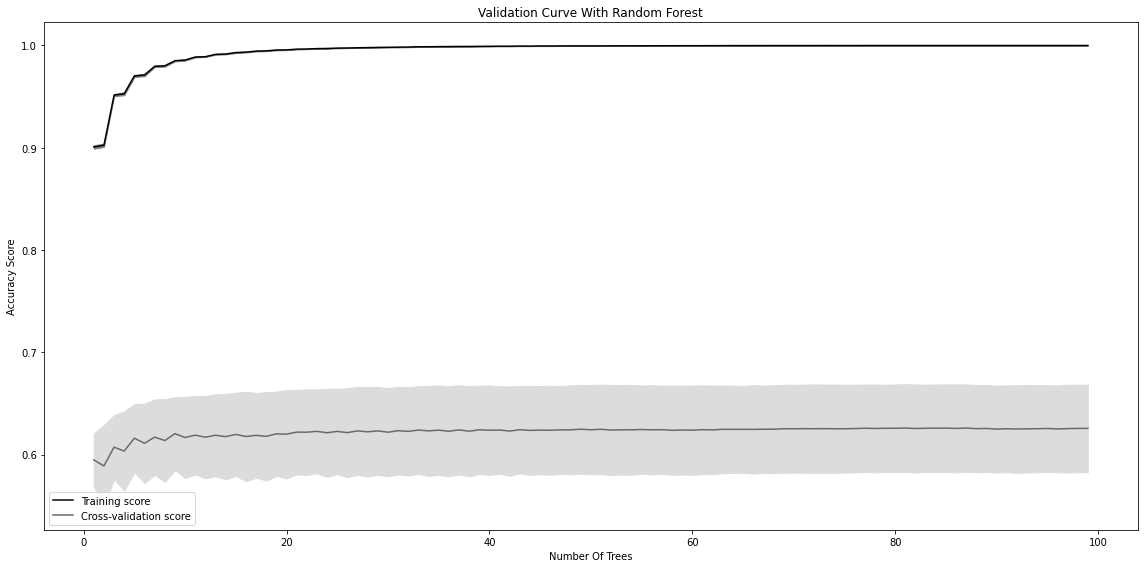

In [36]:
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
from sklearn.model_selection import validation_curve

# Setting the range for the parameter (from 1 to 1000)
param_range = np.arange(1, 100, 1)
train_scores, test_scores = validation_curve(rf, 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create the plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#Validation curve is shown below